In [65]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
comp='shannon'
import sys  # update paths
sys.path.append('../../')

sys.path.append('../')

import numpy as np 
import matplotlib.pyplot as plt

import scresonators.fit_resonator.ana_tls as ana_tls
import scresonators.measurement.handy as hy
import seaborn as sns

colors = ["#454c7c", '#b51d14', '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(colors)
#G:\Shared drives\SLab\JJ_fab\Coherence Sample\022125_Resonator\data

if comp=='shannon':
    pth_base ='/Users/sph/Library/CloudStorage/GoogleDrive-circuitqed@gmail.com/'
elif comp=='bf1':
    pth_base='G:/'

folder = 'My Drive/Projects/Materials/'
#folder = 'Shared drives/SLab/JJ_fab/Coherence Sample/'
pth = os.path.join(pth_base,folder)
img_pth = os.path.join(pth,'Outputs/Resonators/')
meas = 'silta6_res3c2'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
params, data_pth, folder, img_name, ind = hy.get_params('mini.yml', meas, pth=pth)
data_pth = os.path.join(data_pth, folder)

In [69]:
df.columns

Index(['Q', 'Qi', 'Qc', '1/Re[1/Qc]', 'phi', 'fc', 'pitch', 'target_freq',
       'resonator_id', 'temp'],
      dtype='object')

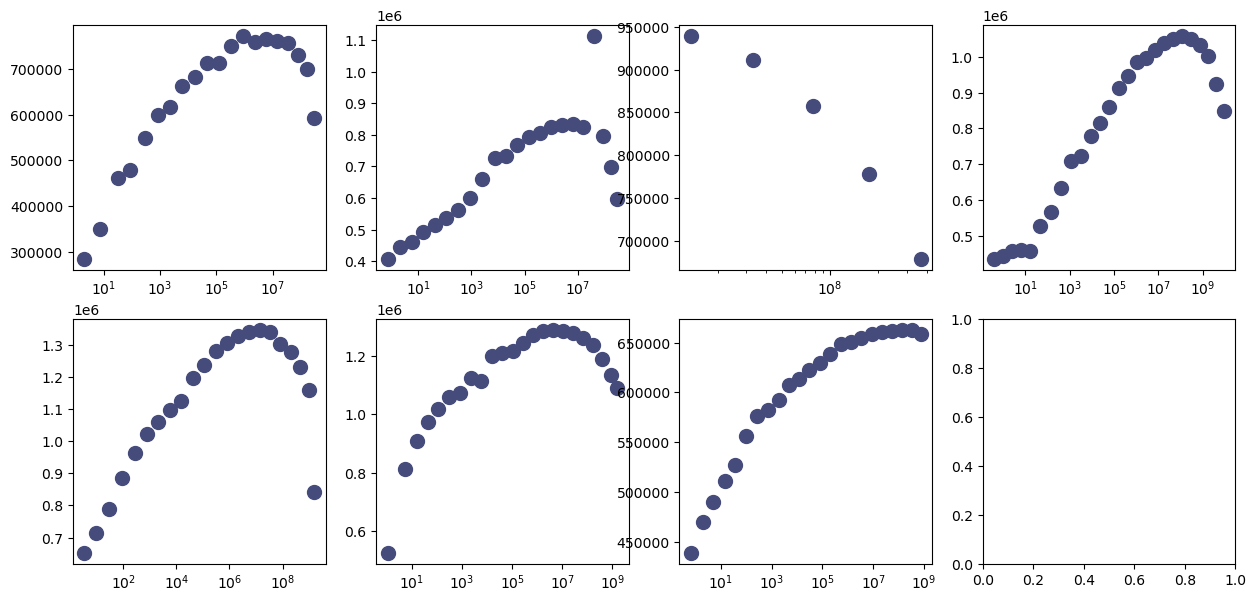

In [72]:
import pandas as pd
fig, ax = plt.subplots(2,4, figsize=(15, 7))
ax = ax.flatten()
df_full = pd.DataFrame()
#ord = [4, 5, 6, 0, 7, 1, 2, 3, 4]
ord = [3, 4, 5, 6, 0, 1, 2]
csv_files_in_dir = [f for f in os.listdir(data_pth) if f.endswith('.csv')]
csv_files_in_dir.sort()
    #print(csv_files_in_dir)
for i, csv_file in enumerate(csv_files_in_dir):
    file_path = os.path.join(data_pth, csv_file)
    df = pd.read_csv(file_path)

    df['pitch']=params['pitch'][i]
    df['target_freq']=params['target_freq'][i]
    df['resonator_id'] = i
    df['temp']=0.04
    df_full = pd.concat([df_full, df], ignore_index=True)
    ax[ord[i]].semilogx(df['photon_number'], df['q_internal_alt'],'o')


In [73]:
df_full = df_full.sort_values(by='pitch')

Failed!


Traceback (most recent call last):
  File "/Users/sph/Documents/Git/scresonators/../scresonators/fit_resonator/ana_tls.py", line 319, in fit_qi2
    p, err = curve_fit(
             ^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py", line 978, in curve_fit
    raise RuntimeError("Optimal parameters not found: " + res.message)
RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


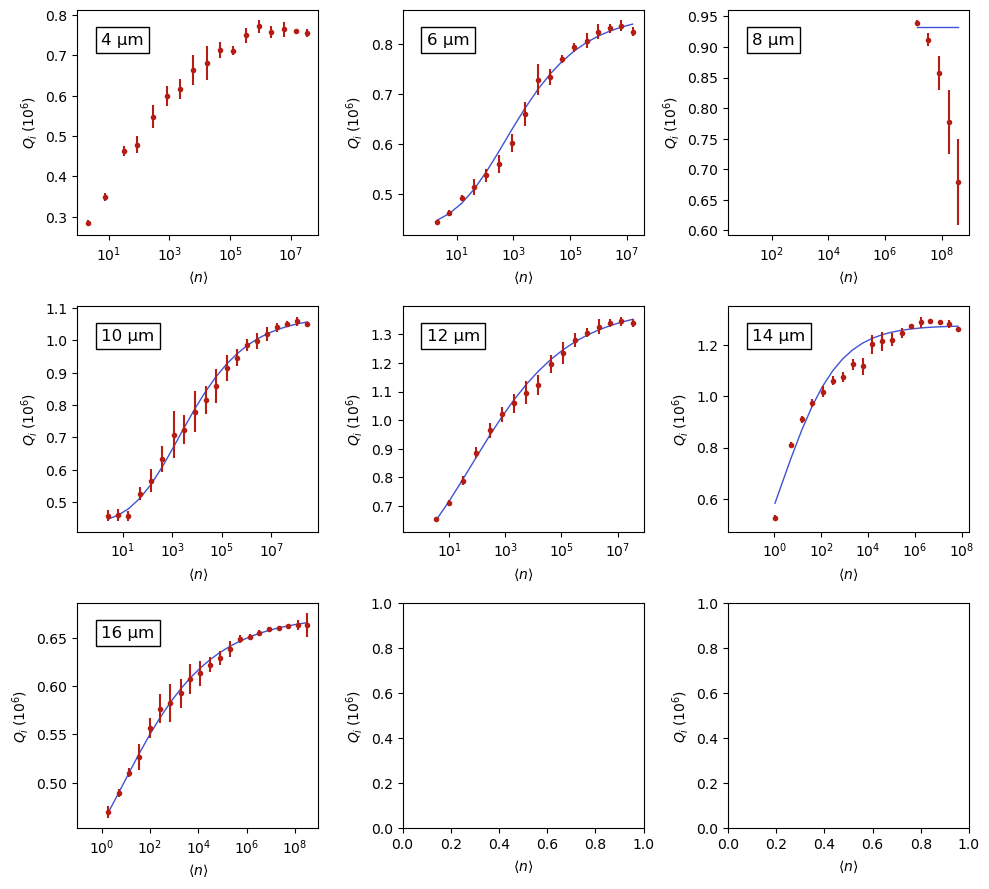

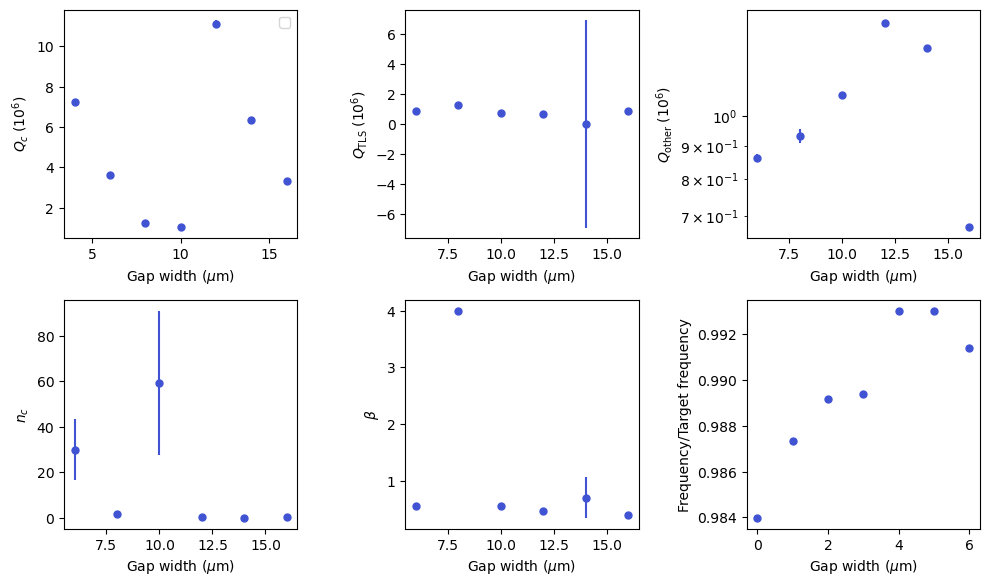

In [85]:
max_photon = [4e7, 4e7, 1e10, 3e8, 0.8e8, 1e8, 5e8]
min_photon = [0.1, 1,1, 1,1,1,1]
params = ana_tls.fit_qi2(df_full, img_pth, name=img_name, max_photon_vec=max_photon, min_photon_vec=min_photon) 
ana_tls.plot_res_pars([params], [''],img_pth, name=img_name)